# TfIdf applicato alla ricerca testuale

In [7]:
import pandas as pd
import numpy as np
from data.recipedata import ItalianRecipes
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation

In [8]:
R = ItalianRecipes(file_path="/Users/Flint/Data/recipes/it_recipes.csv")
docs = [x for x in R.df['Steps'].values if not pd.isnull(x)]

## Tokenizzazione

In [9]:
def tokenizer(text):
    return [token.lower() for token in word_tokenize(text, language='italian') if token not in punctuation]

In [10]:
tokens = tokenizer(docs[0])
print(tokens[:10])

['per', 'preparare', 'il', 'tiramisù', 'preparate', 'il', 'caffé', 'con', 'la', 'moka']


## Indicizzazione e vettorizzazione

In [ ]:
vec = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None)
X = vec.fit_transform(docs).toarray()

In [13]:
vocabulary = vec.get_feature_names_out()
Xdf = pd.DataFrame(X, columns=vocabulary)

In [15]:
Xdf.loc[0].sort_values(ascending=False).head(10)

savoiardi     0.247911
imbevuti      0.244616
mascarpone    0.203100
crema         0.175542
tiramisù      0.166019
albumi        0.165799
e             0.136929
caffè         0.133280
di            0.124049
30x19,5cm     0.122308
Name: 0, dtype: float64

In [48]:
query = docs[0]
q = vec.transform([query]).toarray()

## Ricerca

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
sigma = cosine_similarity(q, X)[0]
answers = pd.Series(sigma).sort_values(ascending=False)

In [51]:
answers.head(10)

0       1.000000
3033    0.593053
475     0.465821
2839    0.427675
1562    0.402933
680     0.396568
529     0.392980
1380    0.382722
183     0.378953
627     0.367553
dtype: float64

In [52]:
print(docs[3033])

Per preparare il tiramisù cominciate preparando il caffè così quando dovrete utilizzarlo sarà gia freddo. Poi occupatevi delle uova: quindi separate accuratamente gli albumi dai tuorli ricordando che, per montare bene, gli albumi non dovranno presentare alcuna traccia di tuorlo. Poi montate i tuorli con le fruste elettriche, versando solo metà dose di zucchero Non appena il composto sarà diventato chiaro e spumoso, e con le fruste ancora in funzione, potrete aggiungere il mascarpone, poco alla volta Incorporato tutto il formaggio avrete ottenuto una crema densa e compatta; tenetela da parte. Pulite molto bene le fruste e passate a montare gli albumi versando il restante zucchero un po’ alla volta Dovrete montarli a neve ben ferma Prendete una cucchiaiata di albumi e versatela nella ciotola con i tuorli e lo zucchero mescolate energicamente con una spatola, così stempererete il composto. Dopodiché procedete ad aggiungere la restante parte di albumi, poco alla volta mescolando molto deli

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [29]:
tsne = TSNE(n_components=2)
X2d = tsne.fit_transform(X)

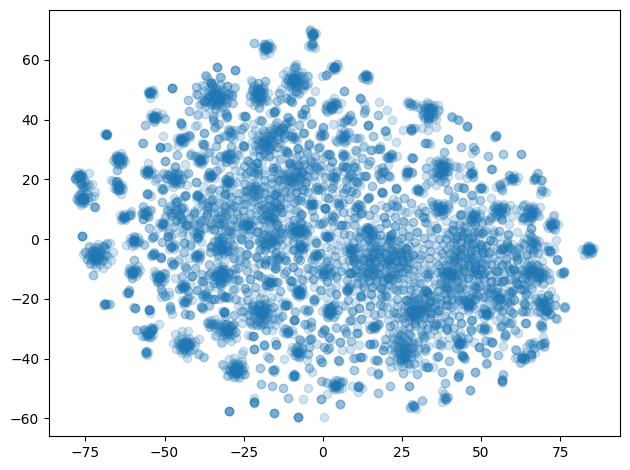

In [30]:

fig, ax = plt.subplots()
ax.scatter(X2d[:,0], X2d[:,1], alpha=0.2)
#ax.scatter(q2d[:,0], q2d[:,1], alpha=1)
plt.tight_layout()
plt.show()